# Necessary libraries and datasets

In [15]:
# Pakages
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

import matplotlib
import matplotlib.pyplot as plt

## Architecture 1

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_65 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_25 (Flatten)         (None, 2304)              0         
_________________________________________________________________
dense_45 (Dense)             (None, 128)               295040    
_________________________________________________________________
dropout_29 (Dropout)         (None, 128)             

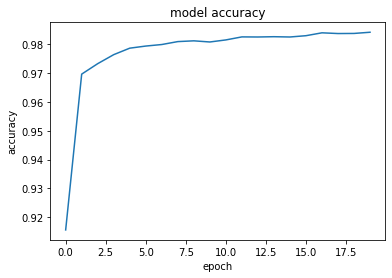

In [32]:
# load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# image dimensions
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# normalize inputs (so all pixel values are transformed from [0,255] to [0,0-1.0]
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0

# Encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# Build the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
# model.add(Conv2D(128, (3, 3), activation='elu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# output layer
model.add(Dense(num_classes, activation='softmax'))

# Compile model
epochs = 20
lrate = 0.4
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.7, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.summary()

# Fit the model
history = model.fit(x_train, y_train, epochs=epochs, batch_size=128)

# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

## Architecture 2

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_59 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_22 (Flatten)         (None, 2304)              0         
_________________________________________________________________
dense_39 (Dense)             (None, 512)               1180160   
_________________________________________________________________
dropout_26 (Dropout)         (None, 512)             

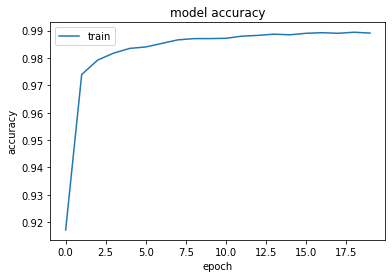

In [29]:
# load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# image dimensions
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# normalize inputs (so all pixel values are transformed from [0,255] to [0,0-1.0]
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0

# Encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# Build the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))

# output layer
model.add(Dense(num_classes, activation='softmax'))

# Compile model
epochs = 20
lrate = 0.1
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.7, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.summary()

# Fit the model
history = model.fit(x_train, y_train, epochs=epochs, batch_size=128)

# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

## Architecture 3

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_70 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_61 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_62 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 6, 6, 128)         73856     
_________________________________________________________________
max_pooling2d_63 (MaxPooling (None, 3, 3, 128)         0         
_________________________________________________________________
flatten_27 (Flatten)         (None, 1152)            

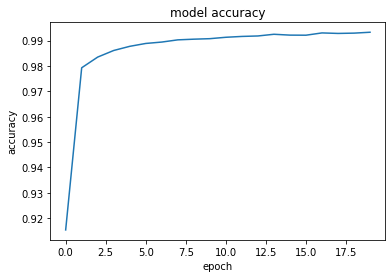

In [34]:
# load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# image dimensions
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# normalize inputs (so all pixel values are transformed from [0,255] to [0,0-1.0]
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0

# Encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# Build the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(num_classes, activation='softmax'))

# Compile model
epochs = 20
lrate = 0.1
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.7, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.summary()

# Fit the model
history = model.fit(x_train, y_train, epochs=epochs, batch_size=128)

# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()